In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars.csv',encoding='latin1')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
# convert to data in lower case
data = data.apply(lambda x:x.astype(str).str.lower())

### Year

In [5]:
# Replacing all the non year values to null values
data.year[data.year.str.isnumeric() == False] = np.nan

In [6]:
#Replace NA values with mode value of year column 
data.year.fillna(data.year.mode()[0],inplace=True)
data.year = data.year.astype(int)

### Price

In [7]:
# Removing commas
data.Price = data.Price.str.replace(',','')
# Replacing non numeric values with Null value
data.Price[data.Price.str.isnumeric() == False] = np.nan
#convert string to int
data.Price = data.Price[data.Price.str.isnumeric() == True].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_12896\4279315821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Price[data.Price.str.isnumeric() == False] = np.nan


In [8]:
# Filling NA values with mean of Price column
data.Price.fillna(data.Price.mean(),inplace=True)

### Kms driven

In [9]:
#convert into numeric values
data.kms_driven = data.kms_driven.str.split(' ').str.get(0).str.replace(',','')
# Replace non - numeric with null value
data.kms_driven[data.kms_driven.str.isnumeric() == False] = np.nan
# Convert to int
data.kms_driven = data.kms_driven[data.kms_driven.str.isnumeric() == True].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_12896\2998474530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.kms_driven[data.kms_driven.str.isnumeric() == False] = np.nan


In [10]:
# fill null values with mean
data.kms_driven.fillna(data.kms_driven.mean(),inplace=True)

### Fuel type

In [11]:
data.fuel_type.value_counts()

petrol    440
diesel    395
nan        55
lpg         2
Name: fuel_type, dtype: int64

In [12]:
# Replace Null values with mode of fuel type
data.fuel_type.replace('nan', data.fuel_type.mode()[0],inplace=True)

In [13]:
data.fuel_type.value_counts()

petrol    495
diesel    395
lpg         2
Name: fuel_type, dtype: int64

### Name 

In [14]:
# taking first 3 words from name column
data.name = data.name.str.split().str.slice(0,3).str.join(' ')

In [15]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing,hyundai,2007,80000.000000,45000.0,petrol
1,mahindra jeep cl550,mahindra,2006,425000.000000,40.0,diesel
2,maruti suzuki alto,maruti,2018,404688.534422,22000.0,petrol
3,hyundai grand i10,hyundai,2014,325000.000000,28000.0,petrol
4,ford ecosport titanium,ford,2014,575000.000000,36000.0,diesel


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        892 non-null    object 
 1   company     892 non-null    object 
 2   year        892 non-null    int32  
 3   Price       892 non-null    float64
 4   kms_driven  892 non-null    float64
 5   fuel_type   892 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 38.5+ KB


### Check for outlier

#### Price

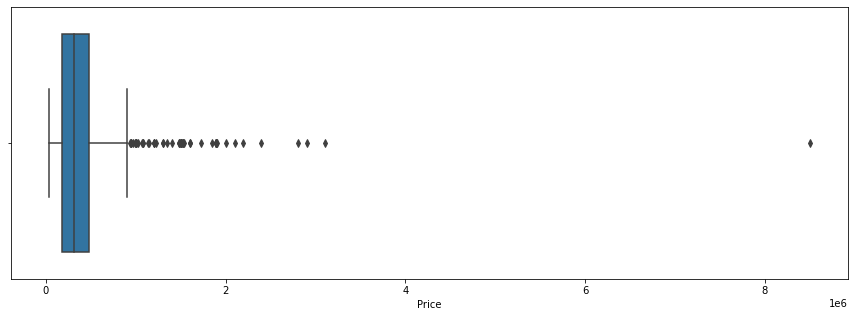

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x = data.Price,data = data)
plt.show()

In [18]:
# Replacing outliers with mean value
data.Price[data.Price>35e5] = data.Price.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_12896\3929246766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Price[data.Price>35e5] = data.Price.mean()


#### Kms_driven

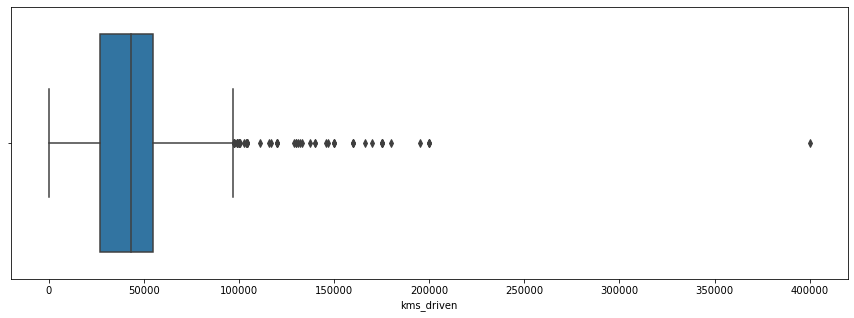

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x = data.kms_driven,data = data)
plt.show()

In [20]:
# Replacing outliers with mean value
data.kms_driven[data.kms_driven>1.8e5] = data.kms_driven.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_12896\2781677741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.kms_driven[data.kms_driven>1.8e5] = data.kms_driven.mean()


In [21]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing,hyundai,2007,80000.000000,45000.0,petrol
1,mahindra jeep cl550,mahindra,2006,425000.000000,40.0,diesel
2,maruti suzuki alto,maruti,2018,404688.534422,22000.0,petrol
3,hyundai grand i10,hyundai,2014,325000.000000,28000.0,petrol
4,ford ecosport titanium,ford,2014,575000.000000,36000.0,diesel


In [22]:
data.to_csv('processed_data.csv')

# Model Building

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [25]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
ohe = OneHotEncoder(categories='auto',)
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [28]:
lr = LinearRegression()

In [29]:
transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

In [30]:
pipe = make_pipeline(transformer,lr)

In [31]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.6468618446963647

In [32]:
#get best fitted random state for train test split as the data available is in less amount
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [33]:
#Maximum r2-score is getting at random state 436
score.index(max(score))

436

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=score.index(max(score)))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2 score at random state : 436 is ',r2_score(y_test,y_pred))

r2 score at random state : 436 is  0.8821258929689088


In [35]:
import pickle as pkl
pkl.dump(transformer,open('transformer.pkl','wb'))
pkl.dump(pipe,open('pipe.pkl','wb'))
pkl.dump(data,open('data.pkl','wb'))
pkl.dump(ohe,open('ohe.pkl','wb'))

In [36]:
# Exapmle
name = 'hyundai santro xing'
company = 'hyundai'
kms =20000
fuel = 'petrol'
year = 2020
predicted_price = pipe.predict(pd.DataFrame([[name,company,year,kms,fuel]],
                                            columns=['name','company','year','kms_driven','fuel_type']))[0]
print('Predicted Price:',predicted_price)

Predicted Price: 379537.11473385245
